In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import timedelta
import os
#from pandas_profiling import ProfileReport

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 1000

In [3]:
def generate_profile(df):
    '''generate pandas profile'''
 
    profile = ProfileReport(df)   
    profile.to_widgets()

In [4]:
#Reload data

#df = pd.read_csv('/Users/Birr/projects/cap2/data/interim/df_aged.csv', low_memory=False)
df = pd.read_csv('D:\cap\capstone2\data\interim\df_1.csv', low_memory=False)

In [5]:
df.rename(columns={'INSTR_AME':'INSTRUCT_AME', 'INSTR_ASE':'INSTRUCT_ASE', 'INSTR_GLI':'INSTRUCT_GLI', 
                    'INSTR_IAIR':'INSTRUCT_IAIR', 'INSTR_SPRT':'INSTRUCT_SPRT', 'INSTR_NONE':'INSTRUCT_NONE',
                    'ALL-INST': 'ALL-INSTRUM', 'GLDR-INST':'GLDR-INSTRUCT', 'MAKE-INST':'MAKE-INSTRUCT',
                    'MENG-INST':'MENG-INSTRUCT', 'NGHT-INST':'NGHT-INSTRUCT', 'SENG-INST':'SENG-INSTRUCT'}, inplace=True)

In [6]:

to_strip = ['pilot_key', 'ev_date', 'far_part', 'crew_category', 'crew_sex', 'med_certf', 'med_crtf_vldty', 
            'cat_descript', 'sub_descript', 'sec_descript', 'subsec_descript',  'mod_descript', 'Cause_Factor',
            'ev_type', 'mid_air', 'on_ground_collision', 'light_cond', 'ev_highest_injury', 'wx_cond_basic', 'type_fly']

for col in to_strip:
    df[col] = df[col].str.strip()
    

In [7]:
df['ev_date'] = pd.to_datetime(df['ev_date'])

In [8]:
#analyze far_part data (type of operation)
df.far_part.value_counts()

91      35454
UNK        24
103         6
091K        4
Name: far_part, dtype: int64

In [9]:
#unable to impute UNK values -- drop records
df.drop(df[df['far_part'] == 'UNK'].index, inplace = True)
df.far_part.value_counts()

91      35454
103         6
091K        4
Name: far_part, dtype: int64

In [10]:
df['far_part'].isna().sum(axis=0)

12155

In [11]:
df['far_part'] = df['far_part'].fillna('delete')

In [12]:
df.drop(df[df['far_part'] == 'delete'].index, inplace = True)

In [13]:
df['far_part'].isna().sum(axis=0)

0

In [14]:
#Analyze crew category
df['crew_category'].isna().sum(axis=0)

293

In [15]:
df['crew_category'] = df['crew_category'].fillna('UNK')
df.crew_category.value_counts()

PILOT      33207
STUDENT     1942
UNK          315
Name: crew_category, dtype: int64

In [16]:
unkstu = df[df['crew_category']=='UNK']
unkstu.head(10)

,Unnamed: 0,pilot_key,ev_id,ac_key,find_key,ev_date,far_part,second_pilot,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,date_lst_med,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type,ev_country,mid_air,on_ground_collision,light_cond,ev_highest_injury,wx_cond_basic,flt_plan_filed,type_fly,phase_flt_spec,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FE,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_RMPT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTR_GYRO,INSTR_HELI,INSTRUCT_IAIR,INSTR_IHEL,INSTR_PLFT,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_HELI,INSTRUM_PLFT,INSTRUM_NONE,OTHR_AIRS,OTHR_BALL,OTHR_GLI,OTHR_GYRO,OTHR_HELI,OTHR_PLFT,OTHR_SUAS,OTHR_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INSTRUCT,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,INC-NO,LTA-INST,LTA-IRCV,LTA-L24H,LTA-L30D,LTA-L90D,LTA-PIC,LTA-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,REL-NO,ROTO-INST,ROTO-IRCV,ROTO-L24H,ROTO-L30D,ROTO-L90D,ROTO-PIC,ROTO-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-INST,SIMU-IRCV,SIMU-L24H,SIMU-L30D,SIMU-L90D,SIMU-PIC,SIMU-TOTL
399,399,NaN,20080430X00568,20080430X005681,20080430X0056811,2008-04-18,91,N,UNK,53,NaN,NaN,NaN,NaN,1,Aircraft,6,Aircraft oper/perf/capability,20,Performance/control parameters,10,Airspeed,20,Not attained/maintained,C,ACC,USA,N,N,DAYL,FATL,VMC,NONE,INST,Approach - VFR pattern - final approach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,400,NaN,20080430X00568,20080430X005681,20080430X0056812,2008-04-18,91,N,UNK,53,NaN,NaN,NaN,NaN,2,Personnel issues,6,Task performance,30,Use of equip/info,40,Aircraft control,40,Instructor/check pilot,C,ACC,USA,N,N,DAYL,FATL,VMC,NONE,INST,Approach - VFR pattern - final approach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,546,NaN,20080516X00686,20080516X006861,20080516X0068611,2008-04-23,91,N,UNK,53,NaN,NaN,NaN,NaN,1,Aircraft,6,Aircraft oper/perf/capability,20,Performance/control parameters,52,Prop/rotor parameters,11,Incorrect use/operation,C,ACC,USA,N,N,DAYL,NONE,VMC,NONE,INST,Landing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547,547,NaN,20080516X00686,20080516X006861,20080516X0068612,2008-04-23,91,N,UNK,53,NaN,NaN,NaN,NaN,3,Environmental issues,3,Conditions/weather/phenomena,40,Wind,45,Gusts,99,Not specified,F,ACC,USA,N,N,DAYL,NONE,VMC,NONE,INST,Landing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [17]:
# impute student if cert_stu = true
stud_cert = df.loc[(df['crew_category'] == 'UNK') & (df['CERT_STU'] == 1.0)]
stud_cert.head(0)

# none found

,Unnamed: 0,pilot_key,ev_id,ac_key,find_key,ev_date,far_part,second_pilot,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,date_lst_med,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type,ev_country,mid_air,on_ground_collision,light_cond,ev_highest_injury,wx_cond_basic,flt_plan_filed,type_fly,phase_flt_spec,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FE,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_RMPT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTR_GYRO,INSTR_HELI,INSTRUCT_IAIR,INSTR_IHEL,INSTR_PLFT,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_HELI,INSTRUM_PLFT,INSTRUM_NONE,OTHR_AIRS,OTHR_BALL,OTHR_GLI,OTHR_GYRO,OTHR_HELI,OTHR_PLFT,OTHR_SUAS,OTHR_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INSTRUCT,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,INC-NO,LTA-INST,LTA-IRCV,LTA-L24H,LTA-L30D,LTA-L90D,LTA-PIC,LTA-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,REL-NO,ROTO-INST,ROTO-IRCV,ROTO-L24H,ROTO-L30D,ROTO-L90D,ROTO-PIC,ROTO-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-INST,SIMU-IRCV,SIMU-L24H,SIMU-L30D,SIMU-L90D,SIMU-PIC,SIMU-TOTL


In [18]:
#using domain knowledge will impute any UNK with less than 60 hour of flt time as Student, otherwise Pilot
unk_low_time = df.loc[(df['ALL-TOTL'] <= 60) & (df['crew_category'] == 'UNK')]
unk_low_time.shape

(0, 146)

There are no Crew_category UNK records with less that 60 flight hours. Inpute all UNK records as pilots.

In [19]:
df['crew_category'] = df['crew_category'].replace(['UNK'], 'PILOT')
df.crew_category.value_counts()

PILOT      33522
STUDENT     1942
Name: crew_category, dtype: int64

In [20]:
df['crew_sex'].isna().sum(axis=0)

7640

In [21]:
#analyse crew_sex
df['crew_sex'] = df['crew_sex'].fillna('UNK')
df.crew_sex.value_counts()

M      26894
UNK     7640
F        930
Name: crew_sex, dtype: int64

In [22]:
df['med_certf'].isna().sum(axis=0)

375

In [23]:
df['med_certf'] = df['med_certf'].fillna('UNK')
df['med_certf'] = df['med_certf'].str.strip()
df.med_certf.value_counts()

CL3     19377
CL2      7931
CL1      3539
NONE     1918
SPRT     1752
UNK       542
BASC      405
Name: med_certf, dtype: int64

In [24]:
#sport pilots do now required a med cert, Basic is not an official medical certificate. Entries may have been done to reflect
#other information. Will condense SPRT/BASC to NONE.

df['med_certf'] = df['med_certf'].replace(['SPRT', 'BASC'],'NONE')
df.med_certf.value_counts()

CL3     19377
CL2      7931
NONE     4075
CL1      3539
UNK       542
Name: med_certf, dtype: int64

In [25]:
df['med_certf'].isna().sum(axis=0)

0

In [26]:
df['med_crtf_vldty'].isna().sum(axis=0)

293

In [27]:
df['med_crtf_vldty'] = df['med_crtf_vldty'].fillna('UNK')
df.med_crtf_vldty.value_counts()

VALID      29797
UNK         3636
INVALID     2031
Name: med_crtf_vldty, dtype: int64

In [28]:
df['med_crtf_vldty'].isna().sum(axis=0)

0

In [29]:
df['ev_date'].isna().sum(axis=0)

0

In [30]:
class3_invalid = df.loc[(df['med_certf'] == 'CL3') & (df['med_crtf_vldty'] == 'UNK')][['pilot_key', 
                                            'ev_date', 'date_lst_med', 'med_certf', 'med_crtf_vldty']]
class3_invalid.sample(20)

,pilot_key,ev_date,date_lst_med,med_certf,med_crtf_vldty
2170,20081004X1204611,2008-09-28,11/1/2005 0:00:00,CL3,UNK
2172,20081004X1204611,2008-09-28,11/1/2005 0:00:00,CL3,UNK
29243,20150203X6485911,2015-01-31,6/4/2014 0:00:00,CL3,UNK
8554,20100320X9231811,2010-03-17,4/19/2007 0:00:00,CL3,UNK
13224,20110504X8015911,2011-05-03,12/29/2010 0:00:00,CL3,UNK
11910,20101221X8311111,2010-10-31,NaN,CL3,UNK
30574,20150618X0345511,2015-06-15,8/1/2014 0:00:00,CL3,UNK
13951,20110624X8524611,2011-09-24,4/11/2011 0:00:00,CL3,UNK
2171,20081004X1204611,2008-09-28,11/1/2005 0:00:00,CL3,UNK
10616,20100820X1324711,2010-08-20,NaN,CL3,UNK


Will derive medical certificate validity for UNK values by creating and checking medical expirtion date (last medical +  medical validity time) vs. event date if medical expiration is before event date then UNK will be changed to INVALID.

In [31]:
df['date_lst_med'].isna().sum(axis=0)

3895

In [32]:
#replace date_last_medical NaN values with future date
df['date_lst_med'] = df['date_lst_med'].replace(np.nan, '01/01/2080')
df['date_lst_med'] = pd.to_datetime(df['date_lst_med'])
df['date_lst_med'].isna().sum(axis=0)


0

NaN on date last medical replaced to date in the future to indicate no information

In [33]:
# create medical expiration date column and populate based on medical type

c1_valid_days_under40 = 365 
c1_valid_days_over40 =  int(365/2)
c2_valid_days = 365
c3_valid_days_over40  = 365 * 5
c3_valid_days_under40 = 365 * 2

med_cert_idx = df.columns.get_loc('med_certf')
age_idx = df.columns.get_loc('crew_age')
df.insert(9,'medical_exp_date', '')
df['medical_exp_date'] = pd.to_datetime(df['medical_exp_date'])
last_med_idx = df.columns.get_loc('date_lst_med')

for i in range (len(df)):
    if (df.iloc[i, med_cert_idx] == 'CL1') & (df.iloc[i, age_idx] >= 40):
        df.iloc[i, 9] = df.iloc[i, last_med_idx] + timedelta(c1_valid_days_over40)
    elif (df.iloc[i, med_cert_idx] == 'CL1') & (df.iloc[i, age_idx] < 40):
        df.iloc[i, 9] = df.iloc[i, last_med_idx] + timedelta(c1_valid_days_under40)
    elif (df.iloc[i, med_cert_idx] == 'CL2'): 
        df.iloc[i, 9] = df.iloc[i, last_med_idx] + timedelta(c2_valid_days)
    elif (df.iloc[i, med_cert_idx] == 'CL3') & (df.iloc[i, age_idx] >= 40):
        df.iloc[i, 9] = df.iloc[i, last_med_idx] + timedelta(c3_valid_days_over40)
    elif (df.iloc[i, med_cert_idx] == 'CL3') & (df.iloc[i, age_idx] < 40):
        df.iloc[i, 9] = df.iloc[i, last_med_idx] + timedelta(c3_valid_days_under40)               

In [34]:
unk = df[df['med_crtf_vldty'] == 'UNK']


ev_idx = unk.columns.get_loc('ev_date')
exp_idx = unk.columns.get_loc('medical_exp_date')
val_idx = unk.columns.get_loc('med_crtf_vldty')

for i in range (len(unk)):
    if unk.iloc[i, ev_idx] > unk.iloc[i, exp_idx]:
        unk.iloc[i, val_idx] = 'INVALID'

        
unk.med_crtf_vldty.value_counts()     

UNK    3636
Name: med_crtf_vldty, dtype: int64

In [35]:
# subset newly imputed invalid certificates and backfill df

inval = unk[unk['med_crtf_vldty'] == 'INVALID']

val_idx = df.columns.get_loc('med_crtf_vldty')
for i in range (len(inval)):
    for r in range (len(df)):
        if inval.iloc[i,0] == df.iloc[r,0]:
            df.iloc[r, val_idx] = 'INVALID'
           

In [36]:
df.med_crtf_vldty.value_counts()

VALID      29797
UNK         3636
INVALID     2031
Name: med_crtf_vldty, dtype: int64

In [37]:
#combined.to_csv('/Users/Birr/projects/cap2/data/interim/df_aged.csv', index=False)
df.to_csv('D:\cap\capstone2\data\interim\df_2.csv', index=False)

# *** Milestone Reload ***

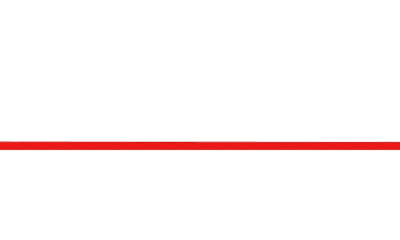

In [38]:
#Reload data

#df = pd.read_csv('/Users/Birr/projects/cap2/data/interim/df_aged.csv', low_memory=False)
df = pd.read_csv('D:\cap\capstone2\data\interim\df_2.csv', low_memory=False)
df.head()

,Unnamed: 0,pilot_key,ev_id,ac_key,find_key,ev_date,far_part,second_pilot,crew_category,medical_exp_date,crew_age,crew_sex,med_certf,med_crtf_vldty,date_lst_med,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,Cause_Factor,ev_type,ev_country,mid_air,on_ground_collision,light_cond,ev_highest_injury,wx_cond_basic,flt_plan_filed,type_fly,phase_flt_spec,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FE,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_RMPT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTR_GYRO,INSTR_HELI,INSTRUCT_IAIR,INSTR_IHEL,INSTR_PLFT,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_HELI,INSTRUM_PLFT,INSTRUM_NONE,OTHR_AIRS,OTHR_BALL,OTHR_GLI,OTHR_GYRO,OTHR_HELI,OTHR_PLFT,OTHR_SUAS,OTHR_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INSTRUCT,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,INC-NO,LTA-INST,LTA-IRCV,LTA-L24H,LTA-L30D,LTA-L90D,LTA-PIC,LTA-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,REL-NO,ROTO-INST,ROTO-IRCV,ROTO-L24H,ROTO-L30D,ROTO-L90D,ROTO-PIC,ROTO-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-INST,SIMU-IRCV,SIMU-L24H,SIMU-L30D,SIMU-L90D,SIMU-PIC,SIMU-TOTL
0,0,20001208X0880311,20001208X08803,20001208X088031,20001208X0880311,1997-09-14,91,N,PILOT,NaN,46,M,CL3,UNK,1995-10-03,2,Personnel issues,4,Action/decision,15,Info processing/decision,20,Decision making/judgment,44,Pilot,C,ACC,USA,N,N,DAYL,FATL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,20001208X0880311,20001208X08803,20001208X088031,20001208X0880312,1997-09-14,91,N,PILOT,NaN,46,M,CL3,UNK,1995-10-03,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,84,Decision related to condition,C,ACC,USA,N,N,DAYL,FATL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,20001208X0880311,20001208X08803,20001208X088031,20001208X0880313,1997-09-14,91,N,PILOT,NaN,46,M,CL3,UNK,1995-10-03,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,82,Effect on operation,C,ACC,USA,N,N,DAYL,FATL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,20001208X0880311,20001208X08803,20001208X088031,20001208X0880314,1997-09-14,91,N,PILOT,NaN,46,M,CL3,UNK,1995-10-03,1,Aircraft,6,Aircraft oper/perf/capability,20,Performance/control parameters,12,Altitude,20,Not attained/maintained,C,ACC,USA,

In [39]:
to_drop = ['Cause_Factor', 'ev_type', 'mid_air', 'on_ground_collision', 'ev_highest_injury']
df.drop(to_drop, axis=1, inplace=True)
df.head()

,Unnamed: 0,pilot_key,ev_id,ac_key,find_key,ev_date,far_part,second_pilot,crew_category,medical_exp_date,crew_age,crew_sex,med_certf,med_crtf_vldty,date_lst_med,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,ev_country,light_cond,wx_cond_basic,flt_plan_filed,type_fly,phase_flt_spec,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FE,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_RMPT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTR_GYRO,INSTR_HELI,INSTRUCT_IAIR,INSTR_IHEL,INSTR_PLFT,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_HELI,INSTRUM_PLFT,INSTRUM_NONE,OTHR_AIRS,OTHR_BALL,OTHR_GLI,OTHR_GYRO,OTHR_HELI,OTHR_PLFT,OTHR_SUAS,OTHR_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INSTRUCT,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,INC-NO,LTA-INST,LTA-IRCV,LTA-L24H,LTA-L30D,LTA-L90D,LTA-PIC,LTA-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,REL-NO,ROTO-INST,ROTO-IRCV,ROTO-L24H,ROTO-L30D,ROTO-L90D,ROTO-PIC,ROTO-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-INST,SIMU-IRCV,SIMU-L24H,SIMU-L30D,SIMU-L90D,SIMU-PIC,SIMU-TOTL
0,0,20001208X0880311,20001208X08803,20001208X088031,20001208X0880311,1997-09-14,91,N,PILOT,NaN,46,M,CL3,UNK,1995-10-03,2,Personnel issues,4,Action/decision,15,Info processing/decision,20,Decision making/judgment,44,Pilot,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,20001208X0880311,20001208X08803,20001208X088031,20001208X0880312,1997-09-14,91,N,PILOT,NaN,46,M,CL3,UNK,1995-10-03,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,84,Decision related to condition,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,20001208X0880311,20001208X08803,20001208X088031,20001208X0880313,1997-09-14,91,N,PILOT,NaN,46,M,CL3,UNK,1995-10-03,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,82,Effect on operation,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,20001208X0880311,20001208X08803,20001208X088031,20001208X0880314,1997-09-14,91,N,PILOT,NaN,46,M,CL3,UNK,1995-10-03,1,Aircraft,6,Aircraft oper/perf/capability,20,Performance/control parameters,12,Altitude,20,Not attained/maintained,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [40]:
# analyze weather condition

In [41]:
df.wx_cond_basic.unique()

array(['IMC', 'VMC', nan, 'UNK'], dtype=object)

In [42]:
df.wx_cond_basic.isna().sum(axis=0)

35

In [43]:
df['wx_cond_basic'] = df['wx_cond_basic'].fillna('UNK')

In [44]:
df.wx_cond_basic.value_counts()

VMC    33070
IMC     2264
UNK      130
Name: wx_cond_basic, dtype: int64

In [45]:
# analyze type fly
df.type_fly.value_counts()

PERS    28204
INST     2415
BUS      1137
POSI      837
OWRK      549
AOBV      517
FLTS      400
ASHO      363
SKYD      268
FERY      229
GLDT      179
BANT      137
EXEC       78
UNK        54
PUBS       23
AAPL       21
PUBU       18
ADRP       14
EXLD       12
PUBF        2
PUBL        2
Name: type_fly, dtype: int64

In [46]:
#condense categories & adjust entries for readability

rep_dict = {'PUBU':'PUBLIC', 'PUBL':'PUBLIC', 'PUBF':'PUBLIC', 'PUBS':'PUBLIC', 'FERY':'FERRY', 'POSI':'FERRY', 'BUS':'BUSS',
            'EXEC':'BUSS', 'OWRK':'OTHRWORK', 'INST':'INSTRUC', 'AOBV':'AERIALOBS', 'FLTS':'FLTTEST', 'ASHO':'ASHOW',
            'GLDT':'GLDTTOW', 'BANT':'BANNTOW', 'AAPL':'CROPDUST', 'ADRP':'AIRDROP', 'EXLD':'EXTERNALLOAD'}

df.type_fly = df.type_fly.replace(rep_dict)
df.type_fly.value_counts()

PERS            28204
INSTRUC          2415
BUSS             1215
FERRY            1066
OTHRWORK          549
AERIALOBS         517
FLTTEST           400
ASHOW             363
SKYD              268
GLDTTOW           179
BANNTOW           137
UNK                54
PUBLIC             45
CROPDUST           21
AIRDROP            14
EXTERNALLOAD       12
Name: type_fly, dtype: int64

In [47]:
#combined.to_csv('/Users/Birr/projects/cap2/data/interim/df_aged.csv', index=False)
df.to_csv('D:\cap\capstone2\data\interim\df_3.csv', index=False)